# Extractive Text Summarization

- Text summarization is commonly used by several websites and applications to create news feed and article summaries.
- Summarization is a technique to shorten long texts such that the summary has all the important points of the actual document.

### Type of Summarization
- **Extractive Summarization**: The extractive approach involves picking up the most important phrases and lines from the documents.
- **Abstractive Summarization**: it uses new phrases and terms, different from the actual document, keeping the points the same, just like how we actually summarize. So, it is much harder than the extractive approach.



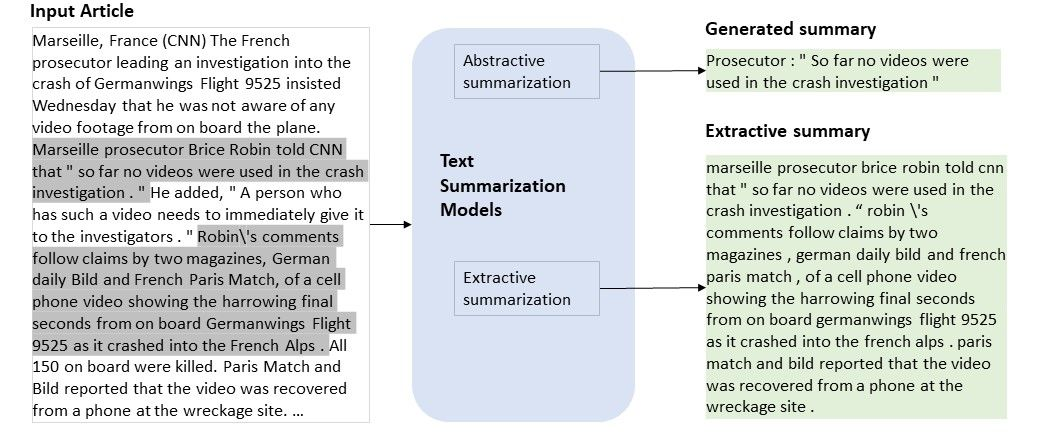

## LexRank
https://www.aaai.org/Papers/JAIR/Vol22/JAIR-2214.pdf
- Graph-based Lexical Centrality as Salience in Text Summarization
- Salience is typically defined in terms of the presence of particular important words or in terms of similarity to a centroid pseudo-sentence.
- This consider a new approach, LexRank, for computing sentence importance based on the concept of eigenvector centrality in a graph representation of sentence
- In this model, a connectivity matrix based on intra-sentence
cosine similarity is used as the adjacency matrix of the graph representation of sentences.


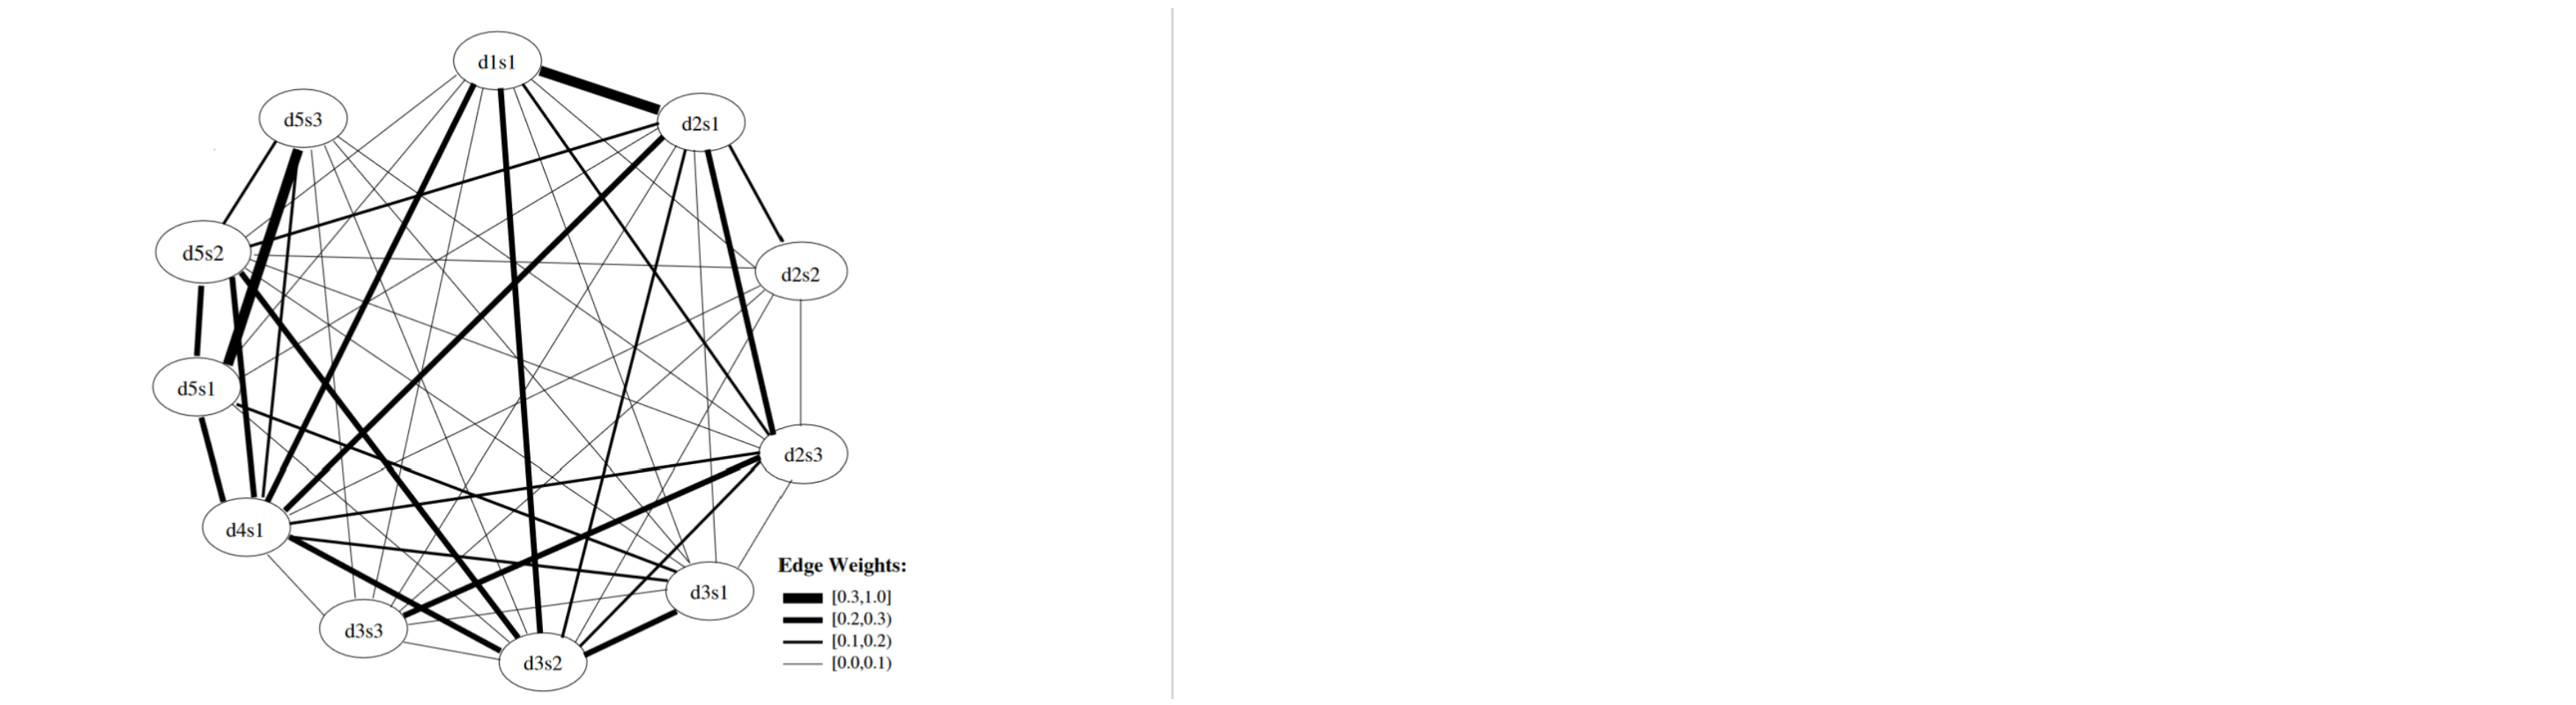

In [1]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sentence_transformers import SentenceTransformer, util


In [4]:
!pip install lexrank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from LexRank import degree_centrality_scores

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
import numpy as np

In [9]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [10]:
document = """
For some, Covid knocked out their sense of smell for months with no precise scientific explanation of why and no therapeutic drugs specifically designed to restore it. 

A research group led by Duke Health could be nearing some answers.

The researchers took biopsies deep inside the nasal cavities of patients struggling to regain their smell months after coming down with Covid. They found evidence of continued inflammation and an immune response that persisted after the virus was long gone, according to a small study published Wednesday in the journal Science Translational Medicine. 

Millions of people around the world lost their smell for at least six months after contracting Covid. This new research could help develop drugs specifically to address the problem in the toughest cases, and it also could help scientists better understand how long Covid affects other organ systems.

“I think that answers the question ‘What’s different about these people? What is damaged and how we might go about fixing that?’” said Dr. Bradley Goldstein, an author of the paper and an associate professor in Duke University’s department of head and neck surgery and communication sciences. “We clearly see a persistent unresolved local immune response.” 

The study evaluated biopsied tissue from the olfactory linings of 24 people, including nine who lost their smell for at least four months. The researchers gathered data on tens of thousands of cells for individual patients, giving them a specific view of what was happening at the cellular level.  

The system that replaces olfactory neurons appears to be vulnerable to ongoing damage from inflammation, Goldstein said. Those struggling to regain their smell had far fewer olfactory nerve cells than typical and many more local immune cells in the olfactory lining where scientists would not typically expect to find them.

The analysis is small in size and more research is needed, said Dr. Aria Jafari, a rhinologist at the UW Medicine Sinus Center in Seattle who was not involved in the study. But he added that the study does a good job describing and providing evidence for a possible mechanism that would explain what he sees in his clinic regularly. 

“That’s really what’s been lacking in our observations of patients with smell loss — why,” he said. “I think this is the first step in really developing therapeutics in this patient population.”

Loss of taste and smell can have a profound impact on people’s lives. Losing smell has been linked to higher death rates in older adults and can have major impacts on people’s emotional and psychological well-being. 

A study published this summer in The BMJ found that about 5% of patients with confirmed Covid cases — some 27 million people worldwide at the time — suffered a “persistent dysfunction” to taste or smell that lasted more than six months. 

Therapies like a nasal steroid rinse or smell training — in which patients twice a day sniff essential oils such as lemon, clove, eucalyptus and rose to stimulate different types of neurons — have had some success in restoring the sense. 

Jafari said that as time goes on, it’s become clear that a small percentage of patients are suffering a persistent loss of smell that stretches longer than 18 months after Covid. 

“Those patients are tougher to treat,” he said. “Smell training works best in patients within the first 18 months of loss and we don’t have a lot of good options after those 18 months.” 

As a next step, Goldstein said, researchers or drug companies could try to develop drugs that block specific immune responses or that promote neuron repair. 

Goldstein and Jafari also said the study’s findings could provide clues to how cases of long Covid are affecting other body systems, too. 

“There’s not a lot of studies that have obtained biopsies of organs affected by long Covid,” Goldstein said. “Are there immune cell mechanisms … involved in other long Covid problems?”"""

In [11]:
sentences = nltk.sent_tokenize(document)

In [12]:
print(len(sentences))

26


In [13]:
embeddings = model.encode(sentences, convert_to_tensor=True)

In [14]:
cos_scores = util.cos_sim(embeddings, embeddings).cpu().numpy()

In [15]:
cos_scores.shape

(26, 26)

In [16]:
centrality_score = degree_centrality_scores(cos_scores, threshold=None)

In [17]:
most_centrality_sentence_indices = np.argsort(-centrality_score)

In [18]:
most_centrality_sentence_indices

array([ 0, 15, 20, 18,  8,  2,  4, 11, 22, 16, 23,  5, 17, 10, 25,  3, 14,
       24, 19, 12,  1, 21,  9, 13,  7,  6])

In [21]:
for id in most_centrality_sentence_indices[:3]:
  print(sentences[id].strip())

For some, Covid knocked out their sense of smell for months with no precise scientific explanation of why and no therapeutic drugs specifically designed to restore it.
“That’s really what’s been lacking in our observations of patients with smell loss — why,” he said.
Jafari said that as time goes on, it’s become clear that a small percentage of patients are suffering a persistent loss of smell that stretches longer than 18 months after Covid.
